In [74]:
#!pip install torch

In [2]:

import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Marginal Model

In [ ]:


class MarginalModel(nn.Module):
    def __init__(self):
        super(MarginalModel, self).__init__()
        self.fc = nn.Sequential(
            nn.Linear(1, 5),
            nn.Tanh(),
            nn.Linear(5, 5),
            nn.Tanh(),
            nn.Linear(5, 5),
            nn.Tanh(),
            nn.Linear(5, 5),
            nn.Tanh(),
            nn.Linear(5, 5),
            nn.Tanh(),
            nn.Linear(5, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.fc(x)

def loss_function(model, x):  # one dimensional x
    x.requires_grad = True
    y_pred = model(x)  # Compute NN output
    dydx = torch.autograd.grad(y_pred, x, torch.ones_like(y_pred), create_graph=True)[0]
    
    # Check for invalid values in dydx
    if torch.any(torch.isnan(dydx)) or torch.any(torch.isinf(dydx)):
        print("Invalid values in dydx:", dydx)
    
    delta_m = 1 / x.shape[0]

    L1 = -torch.mean(torch.log(dydx + 1e-8))  # Add epsilon to avoid log(0)
    L2 = torch.mean(torch.relu(-dydx))
    L3 = torch.abs(1 - torch.mean(dydx * delta_m))
    L4 = model(torch.tensor([[0.0]])) + torch.abs(1 - model(torch.tensor([[1.0]])))
    Loss = L1 + L2 + L3 + 1000 * L4
    return Loss

## Creating data
Z = np.random.standard_normal(100000)
Z_squashed = (Z - np.min(Z)) / (np.max(Z) - np.min(Z))
X = torch.tensor(Z_squashed, dtype=torch.float32).view(-1, 1)

# Training setup
model = MarginalModel()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Training loop
epochs = 5000

for epoch in range(epochs):
    optimizer.zero_grad()
    loss = loss_function(model, X)
    loss.backward()
    optimizer.step()

    if epoch % 500 == 0:
        print(f'Epoch {epoch}, Loss: {loss.item()}')




Epoch 0, Loss: 1003.81298828125
Epoch 500, Loss: 3.0321030616760254
Epoch 1000, Loss: 1.0737708806991577
Epoch 1500, Loss: 0.6611034274101257
Epoch 2000, Loss: 0.4987979829311371
Epoch 2500, Loss: 0.4158557057380676
Epoch 3000, Loss: 0.36743053793907166
Epoch 3500, Loss: 0.33691662549972534
Epoch 4000, Loss: 0.3165333569049835
Epoch 4500, Loss: 0.3024439513683319


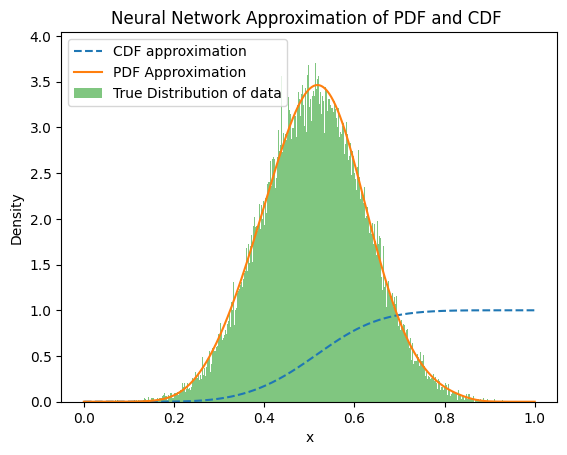

In [62]:
# # Generate x values for plotting
x_points = np.linspace(0, 1, 1000)

x_plot =torch.tensor(x_points, dtype=torch.float32).view(-1, 1)
x_plot.requires_grad = True  # Enable gradients for x_plot
y_pred = model(x_plot)  # Keep y_pred in computation graph
pdfPred = torch.autograd.grad(y_pred, x_plot, torch.ones_like(y_pred), create_graph=True)[0]

### Convert to numpy for plotting
#x_vals = x_plot.detach().numpy()
y_vals = y_pred.detach().numpy()
grad_vals = pdfPred.detach().numpy()

### Plot the neural network approximation
plt.plot(x_points, y_vals, label='CDF approximation', linestyle='dashed')
### Plot the derivative
plt.plot(x_points, grad_vals, label="PDF Approximation", linestyle='solid')
plt.hist(Z_squashed, bins=1000, density=True, alpha=0.6, label='True Distribution of data');
plt.legend()
plt.xlabel('x')
plt.ylabel('Density')
plt.title('Neural Network Approximation of PDF and CDF ')
plt.show()

## Marginal model with other boundaries

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

class MarginalModel(nn.Module):
    def __init__(self):
        super(MarginalModel, self).__init__()
        self.fc = nn.Sequential(
            nn.Linear(1, 5),
            nn.Tanh(),
            nn.Linear(5, 5),
            nn.Tanh(),
            nn.Linear(5, 5),
            nn.Tanh(),
            nn.Linear(5, 5),
            nn.Tanh(),
            nn.Linear(5, 5),
            nn.Tanh(),
            nn.Linear(5, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.fc(x)

def loss_function(model, x):  # one dimensional x
    x.requires_grad = True
    y_pred = model(x)  # Compute NN output
    dydx = torch.autograd.grad(y_pred, x, torch.ones_like(y_pred), create_graph=True)[0]
    
    # Check for invalid values in dydx
    if torch.any(torch.isnan(dydx)) or torch.any(torch.isinf(dydx)):
        print("Invalid values in dydx:", dydx)
    
    delta_m = 1 / x.shape[0]

    L1 = -torch.mean(torch.log(dydx + 1e-8))  # Add epsilon to avoid log(0)
    L2 = torch.mean(torch.relu(-dydx))
    L3 = torch.abs(1 - torch.mean(dydx * delta_m))
    L4 = model(torch.tensor([[0.0]])) + torch.abs(1 - model(torch.tensor([[1.0]])))
    Loss = L1 + L2 + L3 + 1000 * L4
    return Loss

## Creating data
Z = np.random.standard_normal(100000)
scaling = 4
boundaryPoints = scaling * np.array([np.max(Z), np.min(Z)])

Z = np.concatenate((Z, boundaryPoints))



Z_squashed = (Z - np.min(Z)) / (np.max(Z) - np.min(Z))


#plt.hist(Z_squashed, bins=1000, density=True, alpha=0.6, label='True Distribution of data');



X = torch.tensor(Z_squashed, dtype=torch.float32).view(-1, 1)

# Training setup
model = MarginalModel()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Training loop
epochs = 5000

for epoch in range(epochs):
    optimizer.zero_grad()
    loss = loss_function(model, X)
    loss.backward()
    optimizer.step()

    if epoch % 500 == 0:
        print(f'Epoch {epoch}, Loss: {loss.item()}')

Epoch 0, Loss: 1007.9995727539062
Epoch 500, Loss: 0.6810532808303833
Epoch 1000, Loss: -0.7177921533584595
Epoch 1500, Loss: -1.0578701496124268
Epoch 2000, Loss: -1.197338342666626
Epoch 2500, Loss: -1.2691779136657715
Epoch 3000, Loss: -1.3075183629989624
Epoch 3500, Loss: -1.3385248184204102
Epoch 4000, Loss: -1.357695460319519
Epoch 4500, Loss: -1.372563362121582


In [ ]:
# import torch
# import torch.nn as nn
# import torch.optim as optim
# import numpy as np
# import matplotlib.pyplot as plt


# def invert_function(model, y_target, lr=0.01, max_iter=1000):
#     """
#     Inverts the function f(x) learned by the neural network by solving for x such that f(x) = y_target.
    
#     Parameters:
#     - model: The trained neural network model.
#     - y_target: The desired output for which you want to find x.
#     - lr: Learning rate for the gradient descent.
#     - max_iter: Maximum number of iterations for the optimization.
    
#     Returns:
#     - x_inverted: The value of x that approximates f(x) = y_target.
#     """
#     # Initialize x as a random tensor with requires_grad set to True
#     x_inverted = torch.tensor([[np.random.uniform(0, 1)]], requires_grad=True, dtype=torch.float32)
    
#     optimizer = optim.Adam([x_inverted], lr=lr)

#     for _ in range(max_iter):
#         optimizer.zero_grad()
        
#         # Forward pass to get the predicted output
#         y_pred = model(x_inverted)
        
#         # Loss: Mean squared error between the predicted and target y
#         loss = (y_pred - y_target) ** 2
        
#         # Backpropagation
#         loss.backward()
#         optimizer.step()

#         # Optional: print the current x and loss
#         if _ % 100 == 0:
#             print(f"Iteration {_}, x_inverted: {x_inverted.item()}, Loss: {loss.item()}")

#         # Optional: early stopping if loss is sufficiently small
#         if loss.item() < 1e-6:
#             break

#     return x_inverted.item()



# class MarginalModel(nn.Module):
#     def __init__(self):
#         super(MarginalModel, self).__init__()
#         self.fc = nn.Sequential(
#             nn.Linear(1, 5),
#             nn.Tanh(),
#             nn.Linear(5, 5),
#             nn.Tanh(),
#             nn.Linear(5, 5),
#             nn.Tanh(),
#             nn.Linear(5, 5),
#             nn.Tanh(),
#             nn.Linear(5, 5),
#             nn.Tanh(),
#             nn.Linear(5, 1),
#             nn.Sigmoid()
#         )

#     def forward(self, x):
#         return self.fc(x)

# def loss_function(model, x):
#     x.requires_grad = True
#     y_pred = model(x)  # Compute NN output
#     dydx = torch.autograd.grad(y_pred, x, torch.ones_like(y_pred), create_graph=True)[0]
    
#     # Check for invalid values in dydx
#     if torch.any(torch.isnan(dydx)) or torch.any(torch.isinf(dydx)):
#         print("Invalid values in dydx:", dydx)
    
#     delta_m = 1 / x.shape[0]

#     L1 = -torch.mean(torch.log(dydx + 1e-8))  # Add epsilon to avoid log(0)
#     L2 = torch.mean(torch.relu(-dydx))
#     L3 = torch.abs(1 - torch.mean(dydx * delta_m))
#     L4 = model(torch.tensor([[0.0]])) + torch.abs(1 - model(torch.tensor([[1.0]])))
#     Loss = L1 + L2 + L3 + 1000 * L4
#     return Loss

# # Creating data
# Z = np.random.standard_normal(100000)
# scaling = 2
# boundaryPoints = scaling * np.array([np.max(Z), np.min(Z)])
# Z = np.concatenate((Z, boundaryPoints))
# Z_squashed = (Z - np.min(Z)) / (np.max(Z) - np.min(Z))
# X = torch.tensor(Z_squashed, dtype=torch.float32).view(-1, 1)

# # Training setup
# model = MarginalModel()
# optimizer = optim.Adam(model.parameters(), lr=0.01)

# # Training loop
# epochs = 5000
# for epoch in range(epochs):
#     optimizer.zero_grad()
#     loss = loss_function(model, X[:-2])
#     loss.backward()
#     optimizer.step()

#     if epoch % 500 == 0:
#         print(f'Epoch {epoch}, Loss: {loss.item()}')

# # After training, try to invert the model for a given y_target
# y_target = torch.tensor([[0.5]])  # Example target value for f(x)
# x_inverted = invert_function(model, y_target, lr=0.01, max_iter=1000)

# # Print the result
# print(f"Inverted x for y_target = {y_target.item()}: {x_inverted}")

# # Verify by passing the inverted x back through the model
# model_output = model(torch.tensor([[x_inverted]], dtype=torch.float32)).item()
# print(f"Model output at inverted x: {model_output}")


Epoch 0, Loss: nan
Epoch 500, Loss: 1.0740501880645752
Epoch 1000, Loss: -0.001962810754776001
Epoch 1500, Loss: -0.22921410202980042
Epoch 2000, Loss: -0.3199860453605652
Epoch 2500, Loss: -0.3656483292579651
Epoch 3000, Loss: -0.3920363187789917
Epoch 3500, Loss: -0.40848252177238464
Epoch 4000, Loss: -0.41942840814590454
Epoch 4500, Loss: -0.4269045293331146
Iteration 0, x_inverted: 0.3107616901397705, Loss: 0.24966490268707275
Inverted x for y_target = 0.5: 0.4917275309562683
Model output at inverted x: 0.502466082572937


In [64]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm


class MarginalModel(nn.Module):
    def __init__(self):
        super(MarginalModel, self).__init__()
        self.fc = nn.Sequential(
            nn.Linear(1, 5),
            nn.Tanh(),
            nn.Linear(5, 5),
            nn.Tanh(),
            nn.Linear(5, 5),
            nn.Tanh(),
            nn.Linear(5, 5),
            nn.Tanh(),
            nn.Linear(5, 5),
            nn.Tanh(),
            nn.Linear(5, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.fc(x)

def loss_function(model, x):  # one dimensional x
    x.requires_grad = True
    y_pred = model(x)  # Compute NN output
    dydx = torch.autograd.grad(y_pred, x, torch.ones_like(y_pred), create_graph=True)[0]
    
    # Check for invalid values in dydx
    if torch.any(torch.isnan(dydx)) or torch.any(torch.isinf(dydx)):
        print("Invalid values in dydx:", dydx)
    
    delta_m = 1 / x.shape[0]

    L1 = -torch.mean(torch.log(dydx + 1e-8))  # Add epsilon to avoid log(0)
    L2 = torch.mean(torch.relu(-dydx))
    L3 = torch.abs(1 - torch.mean(dydx * delta_m))
    L4 = model(torch.tensor([[0.0]])) + torch.abs(1 - model(torch.tensor([[1.0]])))
    Loss = L1 + L2 + L3 + 1000 * L4
    return Loss

## Creating data
Z = np.random.standard_normal(100000)
scaling = 2
boundaryPoints = scaling * np.array([np.max(Z), np.min(Z)])
Z = np.concatenate((Z, boundaryPoints))
Z_squashed = (Z - np.min(Z)) / (np.max(Z) - np.min(Z))
#plt.hist(Z_squashed, bins=1000, density=True, alpha=0.6, label='True Distribution of data');
X = torch.tensor(Z_squashed, dtype=torch.float32).view(-1, 1)
# Training setup
model = MarginalModel()
optimizer = optim.Adam(model.parameters(), lr=0.01)
# Training loop
epochs = 5000

for epoch in range(epochs):
    optimizer.zero_grad()
    loss = loss_function(model, X[:-2])
    loss.backward()
    optimizer.step()

    if epoch % 500 == 0:
        print(f'Epoch {epoch}, Loss: {loss.item()}')

Epoch 0, Loss: nan
Epoch 500, Loss: 2.6435933113098145
Epoch 1000, Loss: 0.581538200378418
Epoch 1500, Loss: 0.1085570752620697
Epoch 2000, Loss: -0.08008155226707458
Epoch 2500, Loss: -0.17569753527641296
Epoch 3000, Loss: -0.23120467364788055
Epoch 3500, Loss: -0.26614004373550415
Epoch 4000, Loss: -0.2893190085887909
Epoch 4500, Loss: -0.30542248487472534


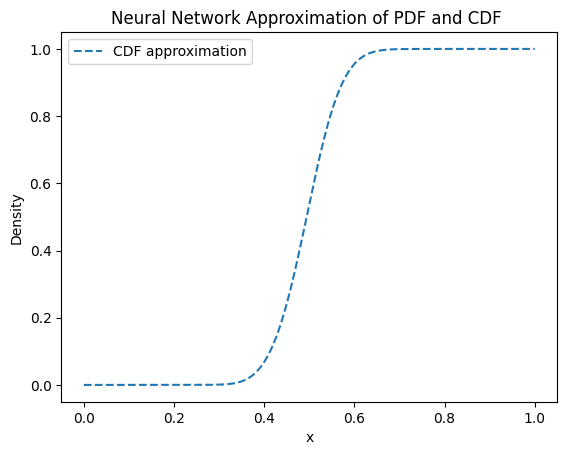

In [65]:
# # Generate x values for plotting
x_points = np.linspace(0, 1, 1000)

x_plot =torch.tensor(x_points, dtype=torch.float32).view(-1, 1)
x_plot.requires_grad = True  # Enable gradients for x_plot
y_pred = model(x_plot)  # Keep y_pred in computation graph
pdfPred = torch.autograd.grad(y_pred, x_plot, torch.ones_like(y_pred), create_graph=True)[0]

### Convert to numpy for plotting
#x_vals = x_plot.detach().numpy()
y_vals = y_pred.detach().numpy()
grad_vals = pdfPred.detach().numpy()

### Plot the neural network approximation
plt.plot(x_points, y_vals, label='CDF approximation', linestyle='dashed')
### Plot the derivative
#plt.plot(x_points, grad_vals, label="PDF Approximation", linestyle='solid')
#plt.hist(Z_squashed, bins=1000, density=True, alpha=0.6, label='True Distribution of data');
plt.legend()
plt.xlabel('x')
plt.ylabel('Density')
plt.title('Neural Network Approximation of PDF and CDF ')
plt.show()

## Test of making inverse network

### solving for inverse using bisection algorithm. 

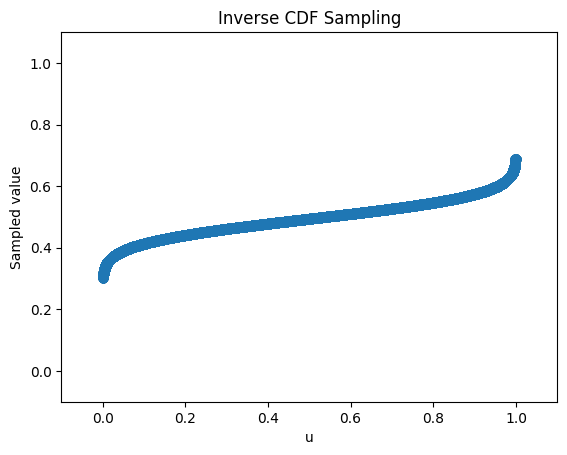

In [66]:
import torch

def vectorized_bisection(f, y, tol=1e-6, max_iter=100):
    """
    Vectorized Bisection Method to find roots of a function f(y) in the interval [0,1] for multiple values of y simultaneously.
    
    Parameters:
    f : function
        The function whose roots are to be found.
    y : torch.Tensor
        Tensor of values for which roots are to be found.
    tol : float, optional
        The tolerance for stopping the iteration (default is 1e-6).
    max_iter : int, optional
        Maximum number of iterations (default is 100).
    
    Returns:
    torch.Tensor
        Tensor of estimated root values.
    """
    a, b = torch.zeros_like(y), torch.ones_like(y)
    
    fa, fb = f(a) - y, f(b) - y
    #assert torch.all(fa * fb < 0), "Function must have opposite signs at a and b for all intervals."
    if not torch.all(fa * fb < 0):
        print("Warning: Some intervals do not contain a root. Adjusting bounds.")
        # Set problematic cases to the closest valid values
        a = torch.where(fa * fb >= 0, torch.zeros_like(y), a)
        b = torch.where(fa * fb >= 0, torch.ones_like(y), b)

    for _ in range(max_iter):
        c = (a + b) / 2  # Midpoint
        fc = f(c) - y
        
        left_mask = fc * fa < 0
        right_mask = fc * fb < 0
        
        a, b = torch.where(left_mask, a, c), torch.where(right_mask, b, c)
        
        if torch.all(torch.abs(b - a) < tol):
            break
    
    return (a + b) / 2

#u = np.random.uniform(0,1,100000) 

eps = 1e-6  # Small epsilon to prevent numerical issues
#u = np.random.uniform(eps, 1 - eps, 100)





u = np.linspace(0.001, 0.999, 1000000)
u = torch.tensor(u, dtype=torch.float32).view(-1, 1)
x = vectorized_bisection(model, u, tol=1e-6, max_iter=1000)

plt.scatter(u, x, label='Inverse CDF')
plt.xlim(-0.1, 1.1)
plt.ylim(-0.1, 1.1)
plt.xlabel('u')
plt.ylabel('Sampled value')
plt.title('Inverse CDF Sampling');


### Inverse neural network

In [ ]:
# import torch
# import torch.nn as nn
# import torch.optim as optim
# import numpy as np

# # Define the model class
# class InverseMarginalModel(nn.Module):
#     def __init__(self):
#         super(InverseMarginalModel, self).__init__()
#         self.fc = nn.Sequential(
#             nn.Linear(1, 10),
#             nn.Tanh(),
#             nn.Linear(10, 10),
#             nn.Tanh(),
#             nn.Linear(10, 10),
#             nn.Tanh(),
#             nn.Linear(10, 1),
#             nn.Sigmoid()
#         )

#     def forward(self, x):
#         return self.fc(x)

# # def loss_function_inverse_marginal(model, inverse_model, x):
# #     x.requires_grad = True
# #     y_pred = model(x)
# #     reconstructed_x = inverse_model(y_pred)
# #     loss = torch.mean((x - reconstructed_x) ** 2)
# #     dydx = torch.autograd.grad(reconstructed_x, y_pred, torch.ones_like(reconstructed_x), create_graph=True)[0]
# #     positiveDerivativeloss = torch.mean(torch.relu(-dydx))
# #     return loss + positiveDerivativeloss 



# def loss_function_inverse_marginal(model, inverse_model, x):
#     x.requires_grad = True
#     y_pred = model(x)
#     reconstructed_x = inverse_model(y_pred)

#     loss = torch.mean((x - reconstructed_x) ** 2)
#     dydx = torch.autograd.grad(reconstructed_x, y_pred, torch.ones_like(reconstructed_x), create_graph=True)[0]
#     #d2ydx2 = torch.autograd.grad(dydx, y_pred, torch.ones_like(dydx), create_graph=True)[0]
#     positiveDerivativeLoss = torch.mean(torch.relu(-dydx))
#     #secondDerivativeLoss = torch.mean(d2ydx2 ** 2)
#     return loss  + positiveDerivativeLoss #+ 0.001*secondDerivativeLoss

# # Create data


# Z = np.linspace(0, 1, 1000)
# X = torch.tensor(Z, dtype=torch.float32).view(-1, 1)
# InverseModel = InverseMarginalModel()

# # Define optimizer
# optimizer = optim.Adam(InverseModel.parameters(), lr=0.001)

# # Training loop
# epochs = 10000

# for epoch in range(epochs):
#     optimizer.zero_grad()  # Zero the gradients
#     loss = loss_function_inverse_marginal(model , InverseModel, X)  # Compute the loss
#     loss.backward()  # Backpropagate the gradients
#     optimizer.step()  # Update model parameters

#     if epoch % 500 == 0:
#         print(f'Epoch {epoch}, Loss: {loss.item()}')


Epoch 0, Loss: 0.08221111446619034
Epoch 500, Loss: 0.014723309315741062
Epoch 1000, Loss: 0.014155748300254345
Epoch 1500, Loss: 0.011870567686855793
Epoch 2000, Loss: 0.009375553578138351
Epoch 2500, Loss: 0.008459771052002907
Epoch 3000, Loss: 0.007787606678903103
Epoch 3500, Loss: 0.007212445139884949
Epoch 4000, Loss: 0.0067961690947413445
Epoch 4500, Loss: 0.006465525832027197
Epoch 5000, Loss: 0.00618470786139369
Epoch 5500, Loss: 0.005946635268628597
Epoch 6000, Loss: 0.005724364425987005
Epoch 6500, Loss: 0.005536271724849939
Epoch 7000, Loss: 0.005367571488022804
Epoch 7500, Loss: 0.005259351804852486
Epoch 8000, Loss: 0.005086925812065601
Epoch 8500, Loss: 0.0049674008041620255
Epoch 9000, Loss: 0.00486304797232151
Epoch 9500, Loss: 0.0047735609114170074


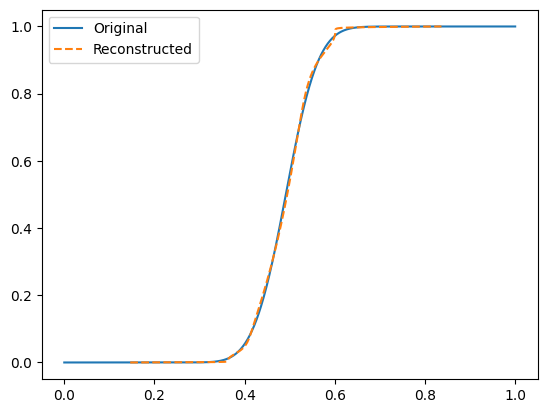

In [ ]:

# u_start = np.linspace(0,1,1000)
# x = torch.tensor(u_start, dtype=torch.float32).view(-1, 1)

# ToUniform = model(x)
# reconstructed = InverseModel(ToUniform)

# plt.plot(u_start, ToUniform.detach().numpy(), label='Original')
# plt.plot(reconstructed.detach().numpy(), ToUniform.detach().numpy(), label='Reconstructed', linestyle='dashed')
# plt.legend()

# Copula Model

In [ ]:
# import torch
# import torch.nn as nn
# import torch.optim as optim
# import numpy as np
# import matplotlib.pyplot as plt
# from scipy.stats import norm

# class CopulaModel(nn.Module):
#     def __init__(self, dimensions):
#         super(CopulaModel, self).__init__()
#         self.fc = nn.Sequential(
#             nn.Linear(dimensions, 10),
#             nn.Tanh(),
#             nn.Linear(10, 10),
#             nn.Tanh(),
#             nn.Linear(10, 10),
#             nn.Tanh(),
#             nn.Linear(10, 10),
#             nn.Tanh(),
#             nn.Linear(10, 10),
#             nn.Tanh(),
#             nn.Linear(10, 1),
#             nn.Sigmoid()
#         )
#         self.upperBoundary = self._generateUpperBoundaryPoints(dimensions)
#         self.lowerBoundary = self._generateLowerBoundPoints(dimensions)


#     def forward(self, x):
#         return self.fc(x)

#     def Copula_loss_function(self, x):  # one dimensional x
#         x.requires_grad = True
#         y_pred = self(x)  # Compute NN output
#         dydx = torch.autograd.grad(y_pred, x, torch.ones_like(y_pred), create_graph=True)[0]
        
#         # Check for invalid values in dydx
#         if torch.any(torch.isnan(dydx)) or torch.any(torch.isinf(dydx)):
#             print("Invalid values in dydx:", dydx)
        
#         delta_m = 1 / x.shape[0]
#         flagSum = self._FlagSum(x,x)


#         L1 = -torch.mean(torch.log(dydx + 1e-8))  # Add epsilon to avoid log(0)
#         L2 = torch.mean(torch.relu(-dydx))
#         L3 = torch.abs(1 - torch.mean(dydx * delta_m ** 2)) ## delta raised to the power of 2 if 2 dimensions
#         L4 = torch.sum(self(self.lowerBoundary)) + torch.sum(torch.abs(self(self.upperBoundary) - torch.min(self.upperBoundary, dim=1).values.view(-1,1)))
#         L5 = 1/(x.shape[0]**2) * torch.sum(torch.abs(y_pred-flagSum))
#         Loss = L1 + L2 + L3 + L4 + L5
#         return Loss
    
#     def _generateLowerBoundPoints(d, num_points=100):
#             grid = np.linspace(0, 1, num_points)  # 1D grid
#             all_surfaces = []
#             for k in range(d):  # Each dimension gets fixed at 0 in turn
#                 grid_points = np.meshgrid(*([grid] * (d - 1)), indexing="ij")
#                 points = np.stack(grid_points, axis=-1).reshape(-1, d - 1)
#                 surface_points = np.insert(points, k, 0, axis=1)
#                 all_surfaces.append(surface_points)
#             return torch.tensor(np.vstack(all_surfaces), dtype=torch.float32)  # Convert to tensor
        
#     def _generateUpperBoundaryPoints(d, num_points=100):
#         oneArray = np.ones((d * num_points, d))
#         u = np.linspace(0, 1, num_points)
#         for i in range(d):
#             oneArray[i * num_points:(i + 1) * num_points, i] = u
#         return torch.tensor(oneArray, dtype=torch.float32)  # Convert to tensor

#     def _flag(x: torch.Tensor, y: torch.Tensor) -> float:
#         return float(torch.all(y < x))  

#     def _FlagSum(x: torch.Tensor, y: torch.Tensor) -> torch.Tensor:
#         tensor = torch.zeros(x.size(0), dtype=torch.float)  

#         for i, x_row in enumerate(x):  # Iterate over rows in x
#             total = 0  # Initialize total for each row
#             for j, y_row in enumerate(y):  # Iterate over rows in y
#                 total += self._flag(x_row, y_row)  # Add the flag value
#             tensor[i] = total  # Store the sum in the corresponding tensor position

#         return tensor



# ## Creating data
# Z = np.random.standard_t(3,100000)
# Z_squashed = (Z - np.min(Z)) / (np.max(Z) - np.min(Z))
# X = torch.tensor(Z_squashed, dtype=torch.float32).view(-1, 1)

# # Training setup
# model = CopulaModel()
# optimizer = optim.Adam(model.parameters(), lr=0.01)

# # Training loop
# epochs = 5000

# for epoch in range(epochs):
#     optimizer.zero_grad()
#     loss = model.Copula_loss_function(X)
#     loss.backward()
#     optimizer.step()

#     if epoch % 500 == 0:
#         print(f'Epoch {epoch}, Loss: {loss.item()}')




In [8]:
class CopulaModel(nn.Module):
    def __init__(self, dataPoints):
        super(CopulaModel, self).__init__()
        dimensions = dataPoints.size(1)
        self.fc = nn.Sequential(
            nn.Linear(dimensions, 10),
            nn.Tanh(),
            nn.Linear(10, 10),
            nn.Tanh(),
            nn.Linear(10, 10),
            nn.Tanh(),
            nn.Linear(10, 10),
            nn.Tanh(),
            nn.Linear(10, 10),
            nn.Tanh(),
            nn.Linear(10, 1),
            nn.Sigmoid()
        )
        
        self.upperBoundary = self._generateUpperBoundaryPoints(dimensions)
        self.lowerBoundary = self._generateLowerBoundPoints(dimensions)


        # Sample data points on the unit square
        u= np.linspace(0.0, 1.0, 15)
        U1, U2 = np.meshgrid(u, u, indexing="ij")
        unitSquarePoints= np.column_stack((U1.ravel(), U2.ravel()))
        self.unitSquaretensor = torch.tensor(unitSquarePoints, dtype=torch.float32)
        self.flagSumData = self._FlagSum(self.unitSquaretensor, self.unitSquaretensor)
        self.delta_m = 1 / dataPoints.shape[0]
        

    def forward(self, x):
        return self.fc(x)

    def Copula_loss_function(self, x): ## MAKE SURE TO PASS IN THE SAME DATAPOINTS AS IN THE INITIALIZATION
        x.requires_grad = True
        y_pred = self(x)
        L5Predictions = self(self.unitSquaretensor)
        dydx = torch.autograd.grad(y_pred, x, torch.ones_like(y_pred), create_graph=True)[0]
        
        if torch.any(torch.isnan(dydx)) or torch.any(torch.isinf(dydx)):
            print("Invalid values in dydx:", dydx)
        
        #delta_m = 1 / x.shape[0]
        # flagSum = self._FlagSum(x, x)

        L1 = -torch.mean(torch.log(torch.relu(dydx) + 1e-8))
        L2 = torch.mean(torch.relu(-dydx))
        L3 = torch.abs(1 - torch.mean(dydx * self.delta_m ** 2))
        L4 = torch.sum(self(self.lowerBoundary)) + torch.sum(torch.abs(self(self.upperBoundary) - torch.min(self.upperBoundary, dim=1).values.view(-1,1)))
        L5 = 1/(L5Predictions.shape[0]**2) * torch.sum(torch.abs(L5Predictions - self.flagSumData))
        Loss = L1 + L2 + L3 + L4 + L5
        return Loss
    
    def _generateLowerBoundPoints(self, d, num_points=100):
        grid = np.linspace(0, 1, num_points)
        all_surfaces = []
        for k in range(d):
            grid_points = np.meshgrid(*([grid] * (d - 1)), indexing="ij")
            points = np.stack(grid_points, axis=-1).reshape(-1, d - 1)
            surface_points = np.insert(points, k, 0, axis=1)
            all_surfaces.append(surface_points)
        return torch.tensor(np.vstack(all_surfaces), dtype=torch.float32)

    def _generateUpperBoundaryPoints(self, d, num_points=100):
        oneArray = np.ones((d * num_points, d))
        u = np.linspace(0, 1, num_points)
        for i in range(d):
            oneArray[i * num_points:(i + 1) * num_points, i] = u
        return torch.tensor(oneArray, dtype=torch.float32)

    def _flag(self, x: torch.Tensor, y: torch.Tensor) -> float:
        return float(torch.all(y < x))

    def _FlagSum(self, x: torch.Tensor, y: torch.Tensor) -> torch.Tensor:
        tensor = torch.zeros(x.size(0), dtype=torch.float)
        for i, x_row in enumerate(x):
            total = 0
            for j, y_row in enumerate(y):
                total += self._flag(x_row, y_row)
            tensor[i] = total
        return tensor

## Creating data
corrMat = np.array([[1, -0.99], [-0.99, 1]])
A = np.linalg.cholesky(corrMat)
np.random.seed(0)
Z = np.random.standard_normal((2000, 2))
X = (A @ Z.T).T

# U_uncorrelated = norm.cdf(Z)
U_correlated = norm.cdf(X)

# U_uncorrelated_tensor = torch.tensor(U_uncorrelated, dtype=torch.float32)
U_correlated_tensor = torch.tensor(U_correlated, dtype=torch.float32)

# Training setup
model = CopulaModel(dataPoints=U_correlated_tensor)
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Training loop
epochs = 5000

for epoch in range(epochs):
    optimizer.zero_grad()
    loss = model.Copula_loss_function(U_correlated_tensor)
    loss.backward()
    optimizer.step()

    if epoch % 500 == 0:
        print(f'Epoch {epoch}, Loss: {loss.item()}')


Epoch 0, Loss: 195.5413818359375
Epoch 500, Loss: 52.70521545410156
Epoch 1000, Loss: 55.44195556640625
Epoch 1500, Loss: 51.14682388305664
Epoch 2000, Loss: 52.21261978149414
Epoch 2500, Loss: 50.749046325683594
Epoch 3000, Loss: 52.77158737182617
Epoch 3500, Loss: 50.49528121948242
Epoch 4000, Loss: 51.135467529296875
Epoch 4500, Loss: 50.794986724853516


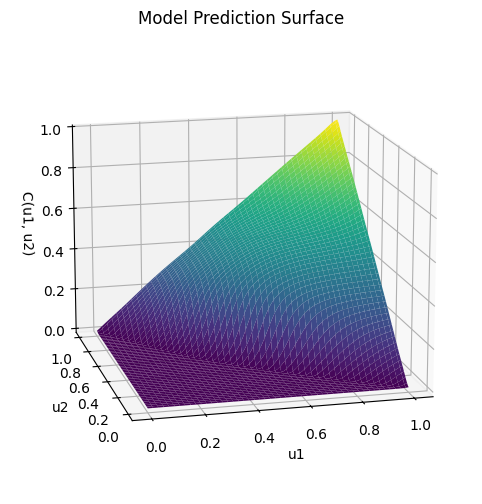

In [9]:
import numpy as np
import torch
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create meshgrid
u1 = np.linspace(0, 1, 100)
u2 = np.linspace(0, 1, 100)
U1, U2 = np.meshgrid(u1, u2, indexing="ij")

# Convert grid to tensor
grid = np.column_stack((U1.ravel(), U2.ravel()))
grid_tensor = torch.tensor(grid, dtype=torch.float32)

# Get model predictions
model.eval()
with torch.no_grad():
    predictions = model(grid_tensor)

# Reshape predictions to match grid shape
Z = predictions.numpy().reshape(100, 100)  # Assuming scalar output

# Plot surface
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(U1, U2, Z, cmap="viridis")

# Labels and title
ax.set_xlabel("u1")
ax.set_ylabel("u2")
ax.set_zlabel("C(u1, u2)")
ax.set_title("Model Prediction Surface")
ax.view_init(elev=15, azim=256)
plt.show()




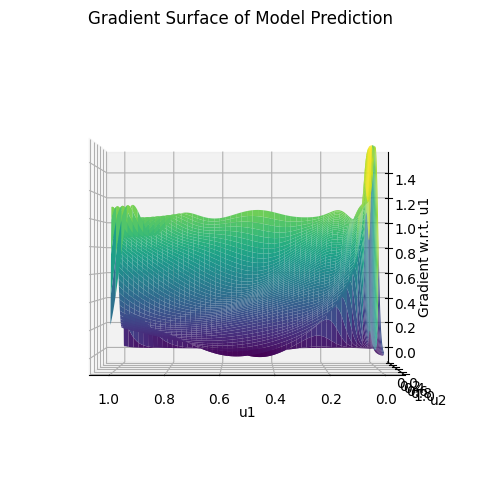

In [13]:
import torch
import numpy as np
import matplotlib.pyplot as plt

# Define input grid
u1 = np.linspace(0, 1, 1000)
u2 = np.linspace(0, 1, 1000)
U1, U2 = np.meshgrid(u1, u2, indexing="ij")

# Convert grid to tensor with gradient tracking
grid = np.column_stack((U1.ravel(), U2.ravel()))
grid_tensor = torch.tensor(grid, dtype=torch.float32, requires_grad=True)

# Forward pass through the model
predictions = model(grid_tensor)

# Compute gradient
dydx = torch.autograd.grad(predictions, grid_tensor, torch.ones_like(predictions), create_graph=True)[0]

# Assuming scalar output, extract gradient w.r.t. first or second input dimension
Z = dydx[:, 0].detach().numpy().reshape(1000, 1000)  # Gradient w.r.t. u1
# Z = dydx[:, 1].detach().numpy().reshape(100, 100)  # Gradient w.r.t. u2 (alternative)

# Plot surface
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(U1, U2, Z, cmap="viridis")

# Labels and title
ax.set_xlabel("u1")
ax.set_ylabel("u2")
ax.set_zlabel("Gradient w.r.t. u1")
ax.set_title("Gradient Surface of Model Prediction")
ax.view_init(elev=0, azim=90)
plt.show()


In [12]:
neg_count = np.sum(Z < 0)
print(f"Number of negative gradients: {neg_count}")
1000 * 1000

Number of negative gradients: 6202


1000000

In [ ]:

# # Define the flag function
# def flag(x: torch.Tensor, y: torch.Tensor) -> int:
#     return int(torch.all(y < x))  # Returns 1 if all elements of y are less than x, else 0

# def FlagSum(x, y):
#     tensor = torch.empty(x.size(0))
#     for i, x_row in enumerate(x):   # Iterate over rows in x
#         sum = 0
#         for j, y_row in enumerate(y):  
#             sum += flag(x_row, y_row)
#         tensor[i] = sum

#     return tensor



tensor([1., 0., 2.])


In [ ]:
# import numpy as np
# import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D

# def generate_surface_points(d, num_points=100):
#     grid = np.linspace(0, 1, num_points)  # 1D grid
#     all_surfaces = []

#     for k in range(d):  # Each dimension gets fixed at 0 in turn
#         grid_points = np.meshgrid(*([grid] * (d - 1)), indexing="ij")
#         points = np.stack(grid_points, axis=-1).reshape(-1, d - 1)
        
#         # Insert the zero at dimension k
#         surface_points = np.insert(points, k, 0, axis=1)
#         all_surfaces.append(surface_points)

#     return np.vstack(all_surfaces)

# # Generate points for a 3D unit cube
# d = 3
# ZeroSurf = generate_surface_points(d, num_points=100)

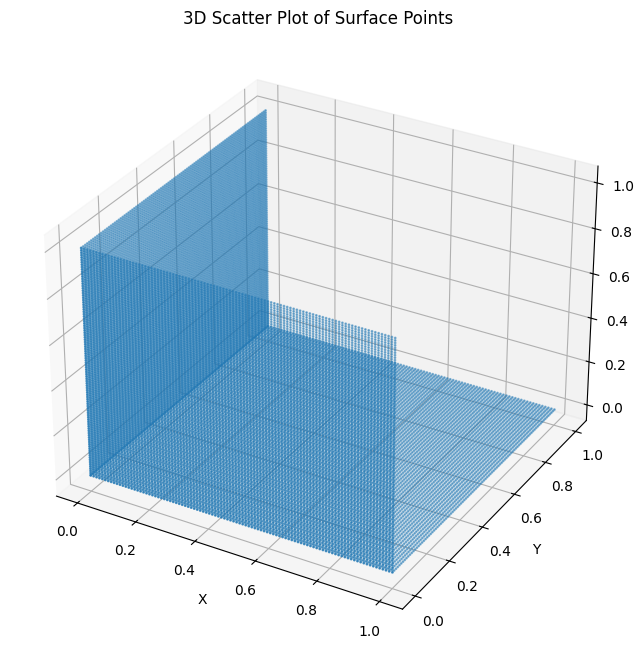

In [ ]:
# # x, y, z = ZeroSurf[:, 0], ZeroSurf[:, 1], ZeroSurf[:, 2]
# fig = plt.figure(figsize=(8, 8))
# ax = fig.add_subplot(111, projection='3d')
# ax.scatter(ZeroSurf[:, 0], ZeroSurf[:, 1], ZeroSurf[:, 2], s=1, alpha=0.5)

# # Labels and title
# ax.set_xlabel("X")
# ax.set_ylabel("Y")
# ax.set_zlabel("Z")
# ax.set_title("3D Scatter Plot of Surface Points")
# plt.show()

In [ ]:
# def generate_one_array(d, num_points):
#     oneArray = np.ones((d * num_points, d))
#     u = np.linspace(0, 1, num_points)
#     for i in range(d):
#         oneArray[i * num_points:(i + 1) * num_points, i] = u
#     return oneArray

# # Example usage
# d = 3
# num_points = 100
# oneArray = generate_one_array(d, num_points)
# #print(oneArray)
# #plt.scatter(oneArray[:, 0], oneArray[:, 1], c='b', alpha=0.6)


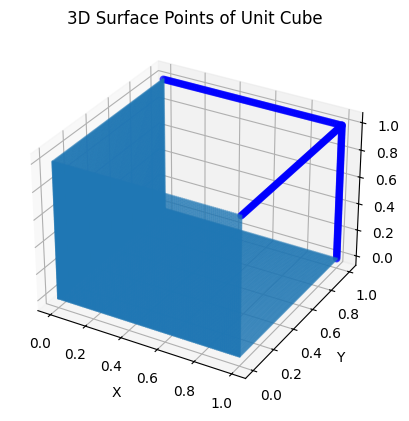

In [ ]:
# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
# ax.scatter(oneArray[:, 0], oneArray[:, 1], oneArray[:, 2], c='b', alpha=0.6)
# ax.scatter(ZeroSurf[:, 0], ZeroSurf[:, 1], ZeroSurf[:, 2], s=1, alpha=0.5)
# ax.set_xlabel("X")
# ax.set_ylabel("Y")
# ax.set_zlabel("Z")
# ax.set_title("3D Surface Points of Unit Cube")
# plt.show()

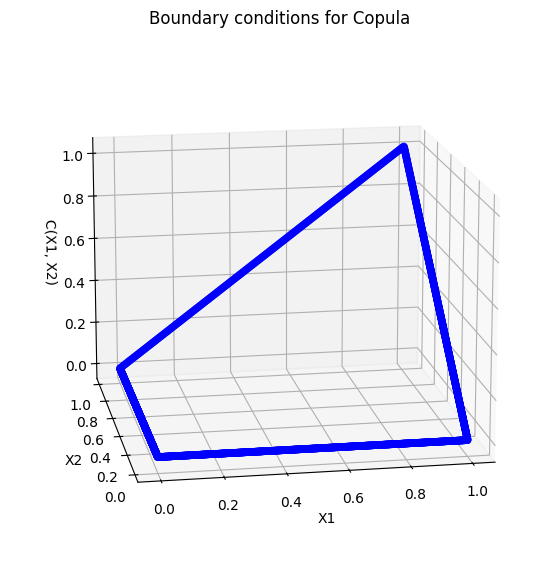

In [ ]:
# import numpy as np
# import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D

# # Number of points per edge
# num_points = 1000

# # Define edges
# bottom = np.linspace([0, 0], [1, 0], num_points)
# right = np.linspace([1, 0], [1, 1], num_points)[1:]
# top = np.linspace([1, 1], [0, 1], num_points)[1:]
# left = np.linspace([0, 1], [0, 0], num_points - 1)[1:]

# # Concatenate all edges
# boundary_points = np.vstack([bottom, right, top, left])

# # Evaluate max(x1, x2) for all points
# max_values = np.min(boundary_points, axis=1)

# # Plot in 3D
# fig = plt.figure(figsize=(7,7))
# ax = fig.add_subplot(111, projection='3d')
# ax.scatter(boundary_points[:, 0], boundary_points[:, 1], max_values, color='b')
# ax.set_xlabel('X1')
# ax.set_ylabel('X2')
# ax.set_zlabel('C(X1, X2)')
# ax.set_title("Boundary conditions for Copula")
# ax.view_init(elev=15, azim=260)
# plt.show()



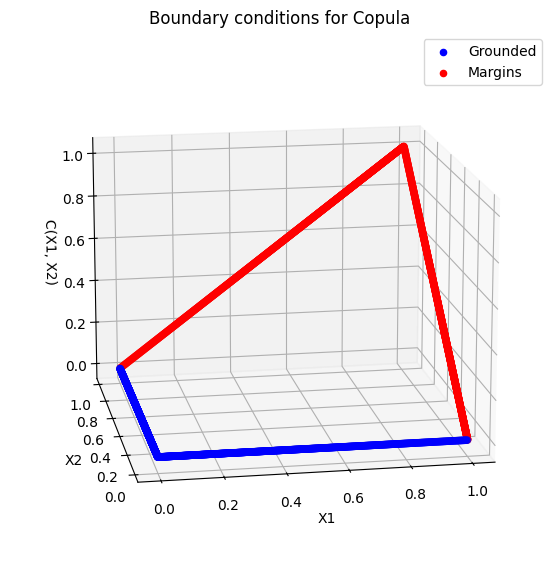

In [266]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Number of points per edge
num_points = 1000

# Define edges
bottom = np.linspace([0, 0], [1, 0], num_points)
right = np.linspace([1, 0], [1, 1], num_points)[1:]
top = np.linspace([1, 1], [0, 1], num_points)[1:]
left = np.linspace([0, 1], [0, 0], num_points - 1)[1:]

# Concatenate all edges
boundary_points = np.vstack([bottom, right, top, left])

# Evaluate max(x1, x2) for all points
#max_values = np.min(boundary_points, axis=1)

# Plot in 3D
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(bottom[:, 0], bottom[:, 1], np.min(bottom, axis=1), color='b',label='Grounded')
ax.scatter(right[:, 0], right[:, 1], np.min(right, axis=1), color='r')
ax.scatter(top[:, 0], top[:, 1], np.min(top, axis=1), color='r',label='Margins')
ax.scatter(left[:, 0], left[:, 1], np.min(left, axis=1), color='b')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('C(X1, X2)')
ax.set_title("Boundary conditions for Copula")
ax.legend()
ax.view_init(elev=15, azim=260)
plt.show()

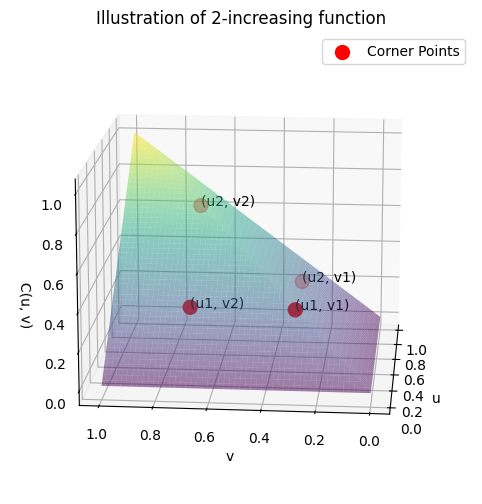

In [242]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def C(u, v):
    return np.minimum(u, v)  # Example function that is 2-increasing

# Define (u1, v1), (u1, v2), (u2, v1), (u2, v2)
u1, v1 = 0.3, 0.3
u2, v2 = 0.7, 0.7

# Ensure ordering for 2-increasing property
assert u1 <= u2 and v1 <= v2, "Ensure u1 <= u2 and v1 <= v2"

# Compute values at the four points
C_u2_v2 = C(u2, v2)
C_u2_v1 = C(u2, v1)
C_u1_v2 = C(u1, v2)
C_u1_v1 = C(u1, v1)

# Compute the inequality result
lhs = C_u2_v2 - C_u2_v1 - C_u1_v2 + C_u1_v1

# Create a meshgrid for plotting
u = np.linspace(0, 1, 100)
v = np.linspace(0, 1, 100)
U, V = np.meshgrid(u, v)
Z = C(U, V)

# Plot the function C(u, v)
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(U, V, Z, cmap='viridis', alpha=0.5)

# Highlight the four key points
ax.scatter([u1, u1, u2, u2], [v1, v2, v1, v2], [C_u1_v1, C_u1_v2, C_u2_v1, C_u2_v2],
           color='red', s=100, label='Corner Points')

# Annotate the points
ax.text(u1, v1, C_u1_v1, "(u1, v1)", color='black')
ax.text(u1, v2, C_u1_v2, "(u1, v2)", color='black')
ax.text(u2, v1, C_u2_v1, "(u2, v1)", color='black')
ax.text(u2, v2, C_u2_v2, "(u2, v2)", color='black')

# Labels and title
ax.set_xlabel('u')
ax.set_ylabel('v')
ax.set_zlabel('C(u, v)')
ax.set_title('Illustration of 2-increasing function')
ax.view_init(elev=15, azim=185)#(elev=15, azim=225)
ax.legend()

plt.show()


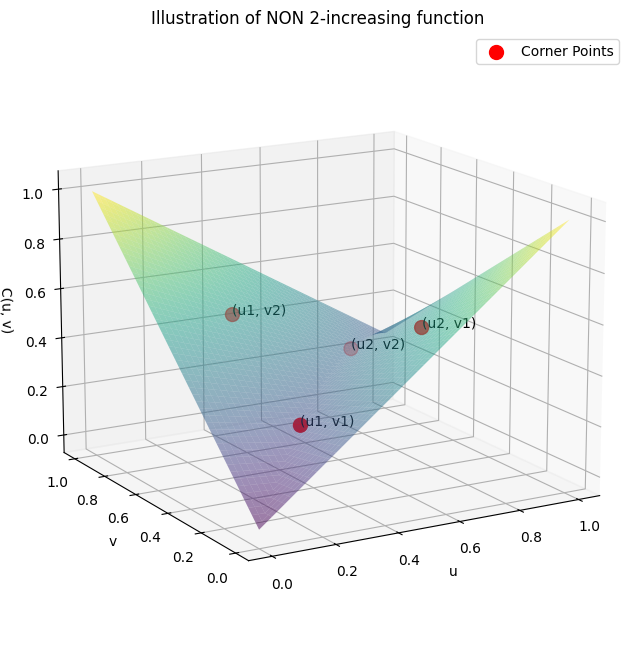

In [239]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def C(u, v):
    return np.maximum(u, v) - 0.75 * u * v  # Example function that is NOT 2-increasing

# Define (u1, v1), (u1, v2), (u2, v1), (u2, v2)
u1, v1 = 0.3, 0.3
u2, v2 = 0.7, 0.7

# Ensure ordering
assert u1 <= u2 and v1 <= v2, "Ensure u1 <= u2 and v1 <= v2"

# Compute values at the four points
C_u2_v2 = C(u2, v2)
C_u2_v1 = C(u2, v1)
C_u1_v2 = C(u1, v2)
C_u1_v1 = C(u1, v1)

# Compute the inequality result
lhs = C_u2_v2 - C_u2_v1 - C_u1_v2 + C_u1_v1

# Create a meshgrid for plotting
u = np.linspace(0, 1, 100)
v = np.linspace(0, 1, 100)
U, V = np.meshgrid(u, v)
Z = C(U, V)

# Plot the function C(u, v)
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(U, V, Z, cmap='viridis', alpha=0.5)

# Highlight the four key points
ax.scatter([u1, u1, u2, u2], [v1, v2, v1, v2], [C_u1_v1, C_u1_v2, C_u2_v1, C_u2_v2],
           color='red', s=100, label='Corner Points')

# Annotate the points
ax.text(u1, v1, C_u1_v1, "(u1, v1)", color='black')
ax.text(u1, v2, C_u1_v2, "(u1, v2)", color='black')
ax.text(u2, v1, C_u2_v1, "(u2, v1)", color='black')
ax.text(u2, v2, C_u2_v2, "(u2, v2)", color='black')

# Labels and title
ax.set_xlabel('u')
ax.set_ylabel('v')
ax.set_zlabel('C(u, v)')
ax.set_title('Illustration of NON 2-increasing function')
ax.view_init(elev=15, azim=240)#(elev=10, azim=225)
ax.legend()

plt.show()

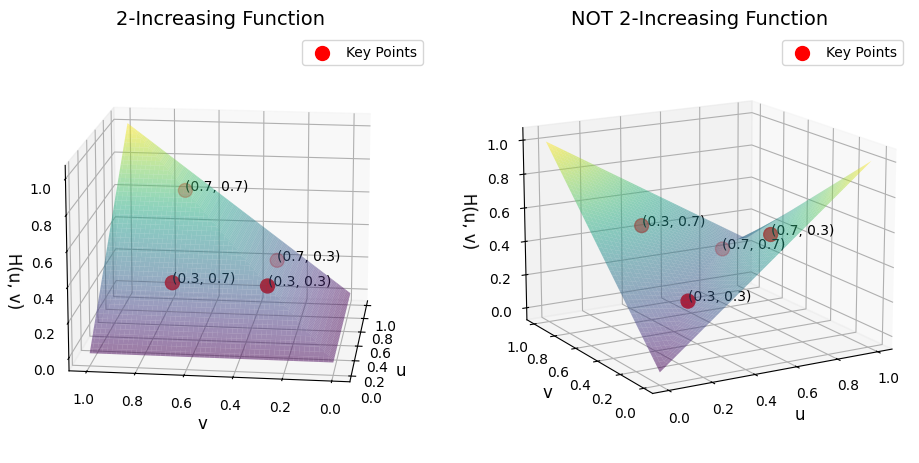

In [246]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def C1(u, v):
    return np.minimum(u, v)  # 2-increasing function

def C2(u, v):
    return np.maximum(u, v) - 0.75 * u * v  # NOT 2-increasing function

# Define (u1, v1), (u1, v2), (u2, v1), (u2, v2)
u1, v1 = 0.3, 0.3
u2, v2 = 0.7, 0.7

assert u1 <= u2 and v1 <= v2, "Ensure u1 <= u2 and v1 <= v2"

# Create a meshgrid for plotting
u = np.linspace(0, 1, 100)
v = np.linspace(0, 1, 100)
U, V = np.meshgrid(u, v)
Z1 = C1(U, V)
Z2 = C2(U, V)

# Compute values at the four key points for both functions
points = [(u1, v1), (u1, v2), (u2, v1), (u2, v2)]
C1_values = [C1(x, y) for x, y in points]
C2_values = [C2(x, y) for x, y in points]

# Create figure
fig = plt.figure(figsize=(12, 6))

# Define custom subplot positions
ax1 = fig.add_axes([0.2, 0.15, 0.35, 0.7], projection='3d')  # Left plot, moved toward center
ax2 = fig.add_axes([0.6, 0.15, 0.35, 0.7], projection='3d')  # Right plot

# First subplot - 2-increasing function
ax1.plot_surface(U, V, Z1, cmap='viridis', alpha=0.5)
ax1.scatter(*zip(*points), C1_values, color='red', s=100, label='Key Points')
for (x, y), z in zip(points, C1_values):
    ax1.text(x, y, z, f"({x:.1f}, {y:.1f})", color='black')
ax1.set_xlabel('u', fontsize=12)
ax1.set_ylabel('v', fontsize=12)
ax1.set_zlabel('H(u, v)', fontsize=12)  # Adjust label position
ax1.set_title('2-Increasing Function', fontsize=14)
ax1.view_init(elev=15, azim=187)
ax1.legend()

# Second subplot - NOT 2-increasing function
ax2.plot_surface(U, V, Z2, cmap='viridis', alpha=0.5)
ax2.scatter(*zip(*points), C2_values, color='red', s=100, label='Key Points')
for (x, y), z in zip(points, C2_values):
    ax2.text(x, y, z, f"({x:.1f}, {y:.1f})", color='black')
ax2.set_xlabel('u', fontsize=12)
ax2.set_ylabel('v', fontsize=12)
ax2.set_zlabel('H(u, v)', fontsize=12)  # Adjust label position
ax2.set_title('NOT 2-Increasing Function', fontsize=14)
ax2.view_init(elev=15, azim=240)#(elev=10, azim=225)
ax2.legend()

plt.show()


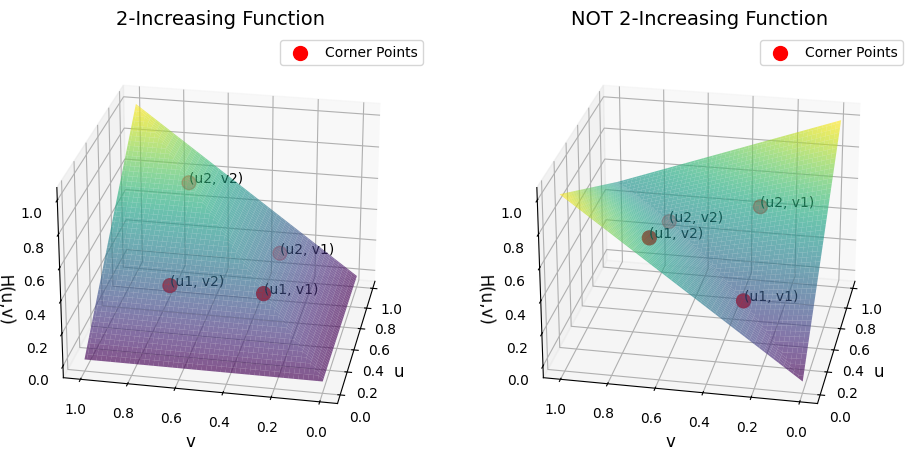

In [60]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def C1(u, v):
    return np.minimum(u, v)  # 2-increasing function

def C2(u, v):
    return np.maximum(u, v) - 0.5 * u * v  # NOT 2-increasing function

# Define (u1, v1), (u1, v2), (u2, v1), (u2, v2)
u1, v1 = 0.3, 0.3
u2, v2 = 0.7, 0.7

assert u1 <= u2 and v1 <= v2, "Ensure u1 <= u2 and v1 <= v2"

# Create a meshgrid for plotting
u = np.linspace(0, 1, 100)
v = np.linspace(0, 1, 100)
U, V = np.meshgrid(u, v)
Z1 = C1(U, V)
Z2 = C2(U, V)

# Compute values at the four key points for both functions
points = [(u1, v1), (u1, v2), (u2, v1), (u2, v2)]
labels = ["(u1, v1)", "(u1, v2)", "(u2, v1)", "(u2, v2)"]
C1_values = [C1(x, y) for x, y in points]
C2_values = [C2(x, y) for x, y in points]

# Create figure
fig = plt.figure(figsize=(12, 6))

# Define custom subplot positions
ax1 = fig.add_axes([0.2, 0.15, 0.35, 0.7], projection='3d')  # Left plot, moved toward center
ax2 = fig.add_axes([0.6, 0.15, 0.35, 0.7], projection='3d')  # Right plot

# First subplot - 2-increasing function
ax1.plot_surface(U, V, Z1, cmap='viridis', alpha=0.65)
ax1.scatter(*zip(*points), C1_values, color='red', s=100, label='Corner Points')
for (x, y), z, label in zip(points, C1_values, labels):
    ax1.text(x, y, z, label, color='black')
ax1.set_xlabel('u', fontsize=12)
ax1.set_ylabel('v', fontsize=12)
ax1.set_zlabel('H(u,v)', fontsize=12)  # Adjust label position
ax1.set_title('2-Increasing Function', fontsize=14)
ax1.view_init(elev=25, azim=191)
ax1.legend()

# Second subplot - NOT 2-increasing function
ax2.plot_surface(U, V, Z2, cmap='viridis', alpha=0.65)
ax2.scatter(*zip(*points), C2_values, color='red', s=100, label='Corner Points')
for (x, y), z, label in zip(points, C2_values, labels):
    ax2.text(x, y, z, label, color='black')
ax2.set_xlabel('u', fontsize=12)
ax2.set_ylabel('v', fontsize=12)
ax2.set_zlabel('H(u,v)', fontsize=12)  # Adjust label position
ax2.set_title('NOT 2-Increasing Function', fontsize=14)
ax2.view_init(elev=25, azim=191)
ax2.legend()

plt.show()


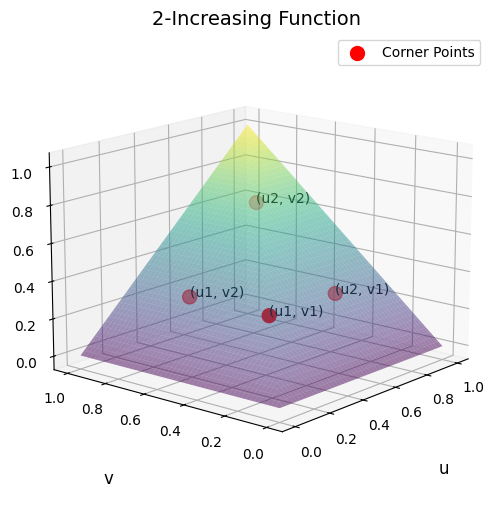

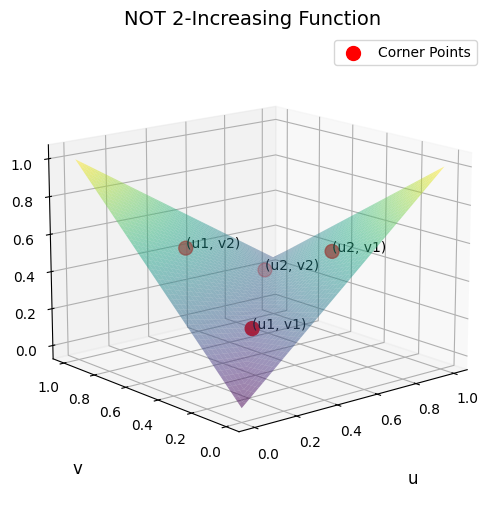

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def C1(u, v):
    return np.minimum(u, v)  # 2-increasing function

def C2(u, v):
    return np.maximum(u, v) - 0.75 * u * v  # NOT 2-increasing function

# Define (u1, v1), (u1, v2), (u2, v1), (u2, v2)
u1, v1 = 0.3, 0.3
u2, v2 = 0.7, 0.7

assert u1 <= u2 and v1 <= v2, "Ensure u1 <= u2 and v1 <= v2"

# Create a meshgrid for plotting
u = np.linspace(0, 1, 100)
v = np.linspace(0, 1, 100)
U, V = np.meshgrid(u, v)
Z1 = C1(U, V)
Z2 = C2(U, V)

# Compute values at the four key points for both functions
points = [(u1, v1), (u1, v2), (u2, v1), (u2, v2)]
labels = ["(u1, v1)", "(u1, v2)", "(u2, v1)", "(u2, v2)"]
C1_values = [C1(x, y) for x, y in points]
C2_values = [C2(x, y) for x, y in points]

# Plot C1 separately
fig1 = plt.figure(figsize=(20, 6))
ax1 = fig1.add_subplot(111, projection='3d')
ax1.plot_surface(U, V, Z1, cmap='viridis', alpha=0.5)
ax1.scatter(*zip(*points), C1_values, color='red', s=100, label='Corner Points')
for (x, y), z, label in zip(points, C1_values, labels):
    ax1.text(x, y, z, label, color='black')
ax1.set_xlabel('u', fontsize=12, labelpad=25)
ax1.set_ylabel('v', fontsize=12, labelpad=25)
ax1.set_zlabel('H(u,v)', fontsize=12, labelpad=10)
ax1.set_title('2-Increasing Function', fontsize=14)
ax1.view_init(elev=15, azim=220)
ax1.legend()
plt.show()

# Plot C2 separately
fig2 = plt.figure(figsize=(7, 6))
ax2 = fig2.add_subplot(111, projection='3d')
ax2.plot_surface(U, V, Z2, cmap='viridis', alpha=0.5)
ax2.scatter(*zip(*points), C2_values, color='red', s=100, label='Corner Points')
for (x, y), z, label in zip(points, C2_values, labels):
    ax2.text(x, y, z, label, color='black')
ax2.set_xlabel('u', fontsize=12, labelpad=25)
ax2.set_ylabel('v', fontsize=12, labelpad=25)
ax2.set_zlabel('H(u,v)', fontsize=12, labelpad=10)
ax2.set_title('NOT 2-Increasing Function', fontsize=14)
ax2.view_init(elev=15, azim=230)
ax2.legend()
plt.show()
